In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('hotel_bookings_data.csv', sep=',')

In [3]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
73848,City Hotel,1,307,2017,October,34,20,0,2,2,...,0,No Deposit,1.0,NaN,0,Family,62.80,0,0,Canceled
51423,City Hotel,1,322,2018,July,21,19,1,3,2,...,0,Non Refund,31.0,NaN,120,Personal,80.00,0,0,Canceled
2728,Resort Hotel,0,2,2017,December,44,28,0,2,1,...,0,No Deposit,NaN,NaN,0,Personal,39.00,0,0,Check-Out
87682,City Hotel,0,194,2018,June,17,21,0,3,2,...,1,No Deposit,7.0,NaN,0,Personal,73.46,0,0,Check-Out
116388,City Hotel,0,15,2019,September,29,18,0,1,1,...,0,No Deposit,14.0,NaN,0,Personal,145.00,0,1,Check-Out


## Data Preprocessing

### <font color = 'darkred'> Handling Missing Values </font>

In [5]:
# Mengecek Missing Values
df_null = df.isna().sum().reset_index()
df_null = df_null.rename(columns={'index':'column', 0:'total'})
df_null[df_null['total']!=0]

,column,total
10,children,4
13,city,488
21,agent,16340
22,company,112593


In [6]:
# Handling Missing Values
df['children'] = df['children'].fillna(0.0)
df['city'] = df['city'].fillna('Unknown')
df['company'] = df['company'].fillna(0.0)
df['agent'] = df['agent'].fillna(0.0)

In [7]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### <font color = 'darkred'> Mengganti Value yang Tidak Sesuai </font>

In [8]:
df['meal'].value_counts()

meal
Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: count, dtype: int64

In [9]:
df['meal'] = df.meal.replace({
    'Breakfast':'With Meal',     
    'Dinner':'With Meal',        
    'No Meal':'No Meal',       
    'Undefined':'No Meal',      
    'Full Board':'With Meal'      
})

In [10]:
df['meal'].value_counts()

meal
With Meal    107571
No Meal       11819
Name: count, dtype: int64

### <font color = 'darkred'> Membuang Data yang Tidak Diperlukan </font>

In [11]:
# Menambahkan kolom baru 'total_guests'
df['total_guests'] = df['adults'] + df['children'] + df['babies']

In [12]:
# Memeriksa pemesanan yang memiliki total tamu 0
to_drop = df[df['total_guests'] == 0].index

In [13]:
len(to_drop)

180

In [14]:
# Menghapus baris yang memenuhi kriteria total tamu 0
df = df.drop(to_drop)

## Data Analyst

### <font color = 'darkblue'>Monthly Hotel Booking Analysis Based on Hotel Type </font>

In [28]:
df['hotel'].value_counts(normalize=True)

hotel
City Hotel      0.664063
Resort Hotel    0.335937
Name: proportion, dtype: float64

In [29]:
df['arrival_date_month'].value_counts()

arrival_date_month
October      13861
September    12644
July         11780
December     11147
June         11078
August       10929
November     10500
May           9768
April         8052
January       6771
February      6759
March         5921
Name: count, dtype: int64

In [30]:
df['arrival_date_month_number'] = df['arrival_date_month'].replace({
    'January':1,
    'February':2,
    'March':3,
    'April':4,
    'May':5,
    'June':6,
    'July':7,
    'August':8,
    'September':9,
    'October':10,
    'November':11,
    'December':12
})

In [17]:
df['arrival_month'] = df['arrival_date_month_number'] + ' ' + df['arrival_date_year']

In [34]:
grouped_hotel_arrival = df.groupby(['arrival_date_year', 'arrival_date_month_number','arrival_month', 'hotel']).size().unstack(fill_value=0).sort_values(by = ['arrival_date_year', 
                                                                                                                                'arrival_date_month_number'], ascending=True)

In [35]:
grouped_hotel_arrival

hotel                                                       City Hotel   
arrival_date_year arrival_date_month_number arrival_month                
2017              1                         January 2017          1233  \
                  2                         February 2017         1649   
                  9                         September 2017        1396   
                  10                        October 2017          2474   
                  11                        November 2017         3524   
                  12                        December 2017         3382   
2018              1                         January 2018          3103   
                  2                         February 2018         2465   
                  3                         March 2018            1364   
                  4                         April 2018            2365   
                  5                         May 2018              3041   
                  6                         June 2018             3558   
                  7                         July 2018             3673   
                  8                         August 2018           3921   
                  9                         September 2018        3119   
                  10                        October 2018          3370   
                  11                        November 2018         3868   
                  12                        December 2018         4212   
2019              3                         March 2019            2366   
                  4                         April 2019            2585   
                  5                         May 2019              3393   
                  6                         June 2019             3911   
                  7                         July 2019             4548   
                  8                         August 2019           3964   
                  9                         September 2019        3556   
                  10                        October 2019          3123   

hotel                                                       Resort Hotel  
arrival_date_year arrival_date_month_number arrival_month                 
2017              1                         January 2017            1104  
                  2                         February 2017           1264  
                  9                         September 2017          1378  
                  10                        October 2017            1409  
                  11                        November 2017           1585  
                  12                        December 2017           1569  
2018              1                         January 2018            1331  
                  2                         February 2018           1381  
                  3                         March 2018               884  
                  4                         April 2018              1519  
                  5                         May 2018                1778  
                  6                         June 2018               1867  
                  7                         July 2018               1802  
                  8                         August 2018             1369  
                  9                         September 2018          1441  
                  10                        October 2018            1685  
                  11                        November 2018           1523  
                  12                        December 2018           1984  
2019              3                         March 2019              1307  
                  4                         April 2019              1583  
                  5                         May 2019                1556  
                  6                         June 2019               1742  
                  7                         July 2019               1757  
                  8                         August 2

In [117]:
hotel_counts = df['hotel'].value_counts()

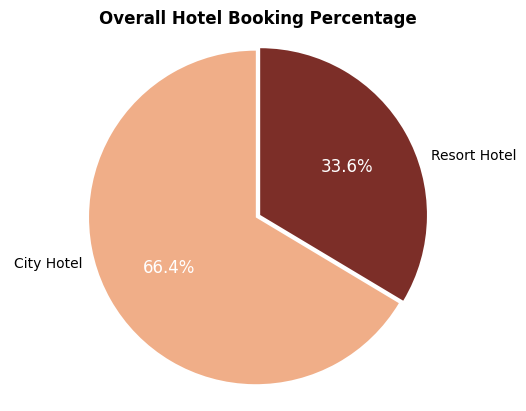

In [116]:
pie_explode = [0, 0.03]
colors = ['#f0ae88', '#7c2e28']

# Membuat pie chart
hotel_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors,
                  textprops={'fontsize':12, 'color':'white'}, labeldistance=None, explode=pie_explode)

# Menambahkan judul
plt.title('Overall Hotel Booking Percentage', fontsize=12, fontweight='bold')
plt.ylabel('')

plt.text(-1.45, -.3, 'City Hotel', fontsize=10, color='Black')
plt.text(1.05, .35, 'Resort Hotel', fontsize=10, color='Black')

plt.axis('equal')  # Mengatur aspek rasio agar menjadi lingkaran
# Menampilkan pie chart
plt.show()

In [122]:
grouped_hotel_arrival = grouped_hotel_arrival.reset_index()

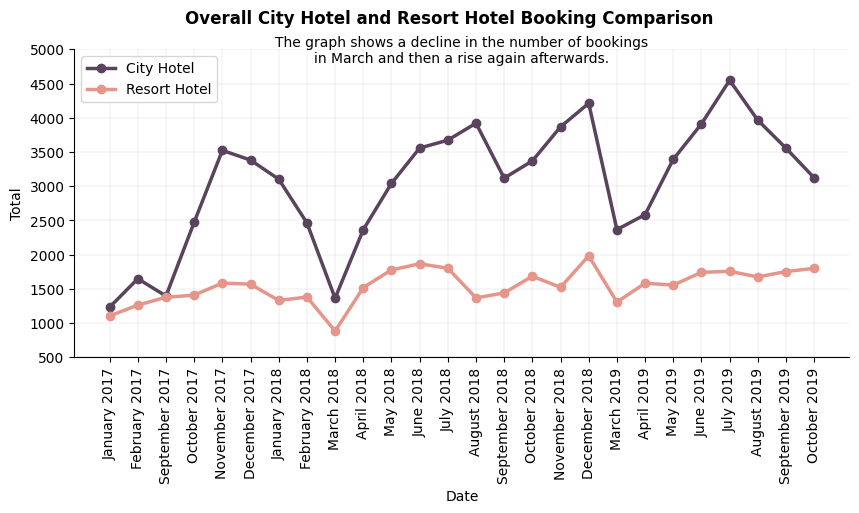

In [173]:
plt.figure(figsize=(10, 4))

plt.plot(grouped_hotel_arrival['arrival_month'], grouped_hotel_arrival['City Hotel'], 
         marker='o', linewidth=2.5, color='#5a435c', label='City Hotel')
plt.plot(grouped_hotel_arrival['arrival_month'], grouped_hotel_arrival['Resort Hotel'], 
         marker='o', linewidth=2.5, color='#e59589', label='Resort Hotel')

plt.grid(linestyle='-', linewidth=0.1, color='grey')
plt.xticks(rotation=90)

y_tick_label,location = plt.yticks()
plt.yticks(y_tick_label, (y_tick_label*1).astype(int))

plt.title('The graph shows a decline in the number of bookings\nin March and then a rise again afterwards.', fontsize=10, y=.93)
plt.suptitle('Overall City Hotel and Resort Hotel Booking Comparison', fontsize=12, fontweight='bold')

plt.xlabel('Date', size=10)
plt.ylabel('Total', size=10)

ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.legend()

plt.show()

### <font color = 'darkblue'> Impact Analysis Of Stay Duration On Hotel Bookings Cancellation Rates </font>

In [176]:
df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']

In [182]:
def create_bins(data, num_bins):
    min_val = min(data)
    max_val = max(data)
    bin_width = (max_val - min_val) / num_bins
    bins = [min_val + i * bin_width for i in range(num_bins)]
    bins.append(max_val)  # tambahkan nilai maksimum sebagai batas atas terakhir
    return bins

In [183]:
data = [0, 69]
num_bins_list = [3, 4, 5]

for num_bins in num_bins_list:
    bins = create_bins(data, num_bins)
    print(f'Number of bins: {num_bins}')
    print('Bins:')
    for i in range(len(bins) - 1):
        print(f'Bin {i+1}: {bins[i]} - {bins[i+1]}')
    print()

Number of bins: 3
Bins:
Bin 1: 0.0 - 23.0
Bin 2: 23.0 - 46.0
Bin 3: 46.0 - 69

Number of bins: 4
Bins:
Bin 1: 0.0 - 17.25
Bin 2: 17.25 - 34.5
Bin 3: 34.5 - 51.75
Bin 4: 51.75 - 69

Number of bins: 5
Bins:
Bin 1: 0.0 - 13.8
Bin 2: 13.8 - 27.6
Bin 3: 27.6 - 41.400000000000006
Bin 4: 41.400000000000006 - 55.2
Bin 5: 55.2 - 69



In [184]:
bins = [0, 14, 28, 42, 55, 100]
labels = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']

df['stay_duration_category'] = pd.cut(df['total_stays'], bins=bins, labels=labels, right=False)

In [188]:
cancelled_bookings = df.groupby(['stay_duration_category', 'hotel'])['is_canceled'].agg(['sum', 'count']).reset_index()

cancelled_bookings['cancellation_rate'] = cancelled_bookings['sum'] / cancelled_bookings['count']

In [189]:
cancelled_bookings

,stay_duration_category,hotel,sum,count,cancellation_rate
0,Very Short,City Hotel,32891,78914,0.416795
1,Very Short,Resort Hotel,10809,38954,0.277481
2,Short,City Hotel,165,224,0.736607
3,Short,Resort Hotel,295,1037,0.284474
4,Medium,City Hotel,23,24,0.958333
5,Medium,Resort Hotel,14,46,0.304348
6,Long,City Hotel,0,1,0.000000
7,Long,Resort Hotel,1,6,0.166667
8,Very Long,City Hotel,0,0,NaN
9,Very Long,Resort Hotel,1,4,0.250000


In [192]:
cancelled_of_all_time = cancelled_bookings.groupby(['hotel'])['sum'].sum().reset_index()

In [194]:
cancelled_of_all_time

,hotel,sum
0,City Hotel,33079
1,Resort Hotel,11120


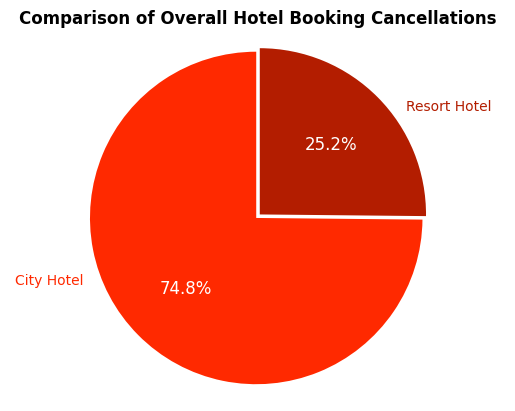

In [265]:
pie_explode = [0, 0.03]
colors = ['#ff2900', '#b31d00']

# Membuat pie chart
plt.pie(cancelled_of_all_time['sum'], autopct='%1.1f%%', startangle=90, colors=colors,
                  textprops={'fontsize':12, 'color':'white'}, labeldistance=None, explode=pie_explode)

# Menambahkan judul
plt.title('Comparison of Overall Hotel Booking Cancellations', fontsize=12, fontweight='bold')
plt.ylabel('')

plt.text(-1.45, -.4, 'City Hotel', fontsize=10, color='#ff2900')
plt.text(.9, .65, 'Resort Hotel', fontsize=10, color='#b31d00')

plt.axis('equal')  # Mengatur aspek rasio agar menjadi lingkaran
# Menampilkan pie chart
plt.show()

In [223]:
cancelled_booking_resort = cancelled_bookings[cancelled_bookings['hotel']=='Resort Hotel']

In [231]:
data = {
    'status_cancel':['Not Cancelled', 'Cancelled'],
    'total':[28927, 11120]
}

df_cancelled_resort = pd.DataFrame(data)

In [232]:
df_cancelled_resort

,status_cancel,total
0,Not Cancelled,28927
1,Cancelled,11120


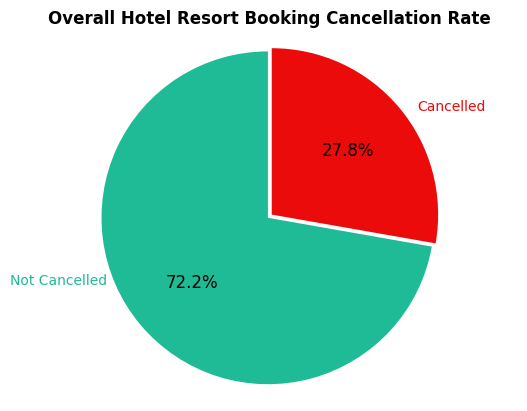

In [266]:
pie_explode = [0, 0.03]
colors = ['#1fba96', '#eb0b0b']

# Membuat pie chart
plt.pie(df_cancelled_resort['total'], autopct='%1.1f%%', startangle=90, colors=colors,
                  textprops={'fontsize':12, 'color':'black'}, labeldistance=None, explode=pie_explode)

# Menambahkan judul
plt.title('Overall Hotel Resort Booking Cancellation Rate', fontsize=12, fontweight='bold')
plt.ylabel('')

plt.text(-1.55, -.4, 'Not Cancelled', fontsize=10, color='#1fba96')
plt.text(.9, .65, 'Cancelled', fontsize=10, color='#eb0b0b')

plt.axis('equal')  # Mengatur aspek rasio agar menjadi lingkaran
# Menampilkan pie chart
plt.show()

In [243]:
cancelled_booking_city = cancelled_bookings[cancelled_bookings['hotel']=='City Hotel']
cancelled_booking_city.groupby(['hotel']).agg({'sum':sum, 'count':sum})

,sum,count
hotel,,
City Hotel,33079,79163


In [245]:
data = {
    'status_cancel':['Not Cancelled', 'Cancelled'],
    'total':[46084, 33079]
}

df_cancelled_city = pd.DataFrame(data)

In [246]:
df_cancelled_city

,status_cancel,total
0,Not Cancelled,46084
1,Cancelled,33079


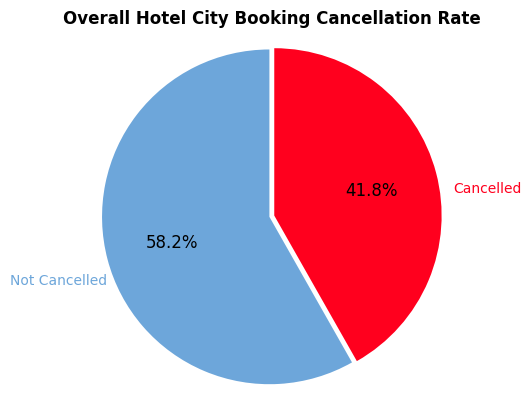

In [263]:
pie_explode = [0, 0.03]
colors = ['#6da6da', '#ff001e']

# Membuat pie chart
plt.pie(df_cancelled_city['total'], autopct='%1.1f%%', startangle=90, colors=colors,
                  textprops={'fontsize':12, 'color':'black'}, labeldistance=None, explode=pie_explode)

# Menambahkan judul
plt.title('Overall Hotel City Booking Cancellation Rate', fontsize=12, fontweight='bold')
plt.ylabel('')

plt.text(-1.55, -.4, 'Not Cancelled', fontsize=10, color='#6da6da')
plt.text(1.1, .15, 'Cancelled', fontsize=10, color='#ff001e')

plt.axis('equal')  # Mengatur aspek rasio agar menjadi lingkaran
# Menampilkan pie chart
plt.show()

In [267]:
cancelled_bookings

,stay_duration_category,hotel,sum,count,cancellation_rate
0,Very Short,City Hotel,32891,78914,0.416795
1,Very Short,Resort Hotel,10809,38954,0.277481
2,Short,City Hotel,165,224,0.736607
3,Short,Resort Hotel,295,1037,0.284474
4,Medium,City Hotel,23,24,0.958333
5,Medium,Resort Hotel,14,46,0.304348
6,Long,City Hotel,0,1,0.000000
7,Long,Resort Hotel,1,6,0.166667
8,Very Long,City Hotel,0,0,NaN
9,Very Long,Resort Hotel,1,4,0.250000


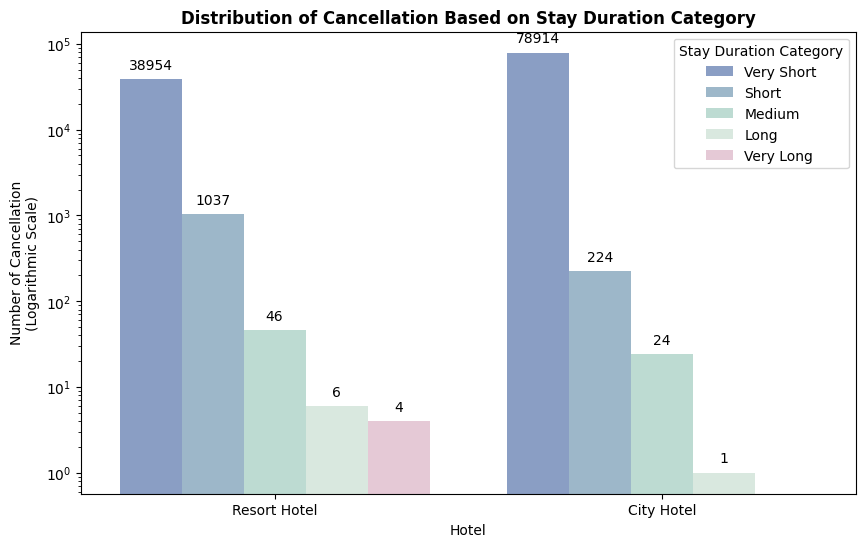

In [285]:
colors = ['#809bce', '#95b8d1', '#b8e0d4', '#d6eadf', '#eac4d5']

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='hotel', hue='stay_duration_category', data=df, palette=colors)
plt.yscale('log')  # Mengubah skala sumbu y menjadi logaritmik

# Menambahkan angka di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Cancellation Based on Stay Duration Category', fontweight='bold')
plt.xlabel('Hotel')
plt.ylabel('Number of Cancellation\n(Logarithmic Scale)')
plt.legend(title='Stay Duration Category', loc='upper right')
plt.xticks(rotation=0)
plt.show()

### <font color = 'darkblue'>  Impact Analysis Of Lead Time On Hotel Bookings Cancellation Rate </font>

In [288]:
df['lead_time'].describe()

count    119210.000000
mean        104.109227
std         106.875450
min           0.000000
25%          18.000000
50%          69.000000
75%         161.000000
max         737.000000
Name: lead_time, dtype: float64

In [290]:
bins = [0, 18, 69, 161, 366, float('inf')]  
labels = ['0-17 days', '18-68 days', '69-160 days', '161-365 days', 'More than 365 days']  

df['lead_time_category'] = pd.cut(df['lead_time'], bins=bins, labels=labels, right=False, include_lowest=True)

In [292]:
aggregate_table = df.groupby(['hotel', 'lead_time_category']).agg(
    total_bookings=pd.NamedAgg(column='is_canceled', aggfunc='count'),
    total_cancellations=pd.NamedAgg(column='is_canceled', aggfunc='sum')
).reset_index()

In [293]:
aggregate_table['cancellation_rate'] = aggregate_table['total_cancellations'] / aggregate_table['total_bookings']

In [297]:
df_aggregate_table= aggregate_table[['hotel', 'lead_time_category', 'cancellation_rate']]

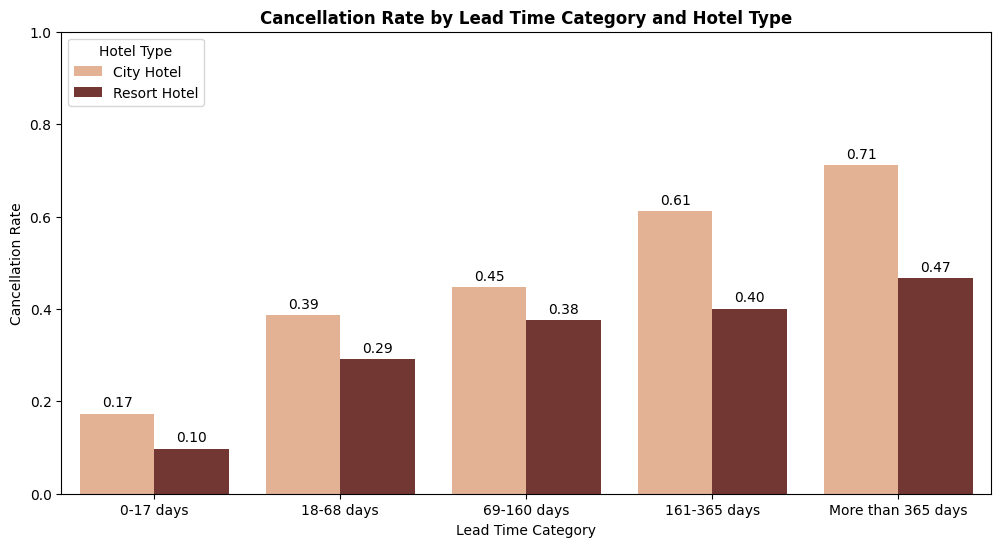

In [300]:
colors=['#f0ae88', '#7c2e28']

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='lead_time_category', y='cancellation_rate', hue='hotel', data=df_aggregate_table, palette=colors)

# Menambahkan label di atas bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

plt.title('Cancellation Rate by Lead Time Category and Hotel Type', fontweight='bold')
plt.xlabel('Lead Time Category')
plt.ylabel('Cancellation Rate')
plt.ylim(0, 1)  
plt.legend(title='Hotel Type', loc='upper left')
plt.show()